### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\CHARISHMA\Downloads\car_df_EDA.csv")

In [3]:
df.head()#first five rows of columns

,Unnamed: 0.1,Unnamed: 0,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,13495
1,1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,16500
2,2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,ohcv,six,152.0,mpfi,9.0,154,5000,19,26,16500
3,3,4,audi,gas,std,four,sedan,fwd,front,99.8,...,ohc,four,109.0,mpfi,10.0,102,5500,24,30,13950
4,4,5,audi,gas,std,four,sedan,4wd,front,99.4,...,ohc,five,136.0,mpfi,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       208 non-null    int64  
 1   Unnamed: 0         208 non-null    int64  
 2   make               208 non-null    object 
 3   fuel_type          208 non-null    object 
 4   aspiration         208 non-null    object 
 5   num_of_doors       208 non-null    object 
 6   body_style         208 non-null    object 
 7   drive_wheels       208 non-null    object 
 8   engine_location    208 non-null    object 
 9   wheel_base         206 non-null    float64
 10  length             208 non-null    float64
 11  width              208 non-null    float64
 12  height             208 non-null    float64
 13  curb_weight        208 non-null    int64  
 14  engine_type        207 non-null    object 
 15  num_of_cylinders   208 non-null    object 
 16  engine_size        206 non

In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,208.000000,208.000000,206.000000,208.000000,208.000000,208.000000,208.000000,206.000000,208.000000,208.000000,208.000000
mean,103.456731,104.456731,98.919903,174.262019,65.950962,53.750481,2563.375000,127.543689,10.194808,25.158654,30.668269
std,60.115573,60.115573,6.121266,12.373790,2.159419,2.435010,521.034018,41.599197,4.044135,6.528187,6.873639
min,0.000000,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,51.750000,52.750000,94.500000,166.675000,64.100000,52.000000,2163.000000,98.000000,8.600000,19.000000,25.000000
50%,103.500000,104.500000,97.000000,173.200000,65.500000,54.100000,2422.500000,120.000000,9.000000,24.000000,30.000000
75%,155.250000,156.250000,102.400000,183.775000,66.900000,55.500000,2959.250000,145.000000,9.400000,30.000000,34.000000
max,204.000000,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
df.describe(include='object')

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,horsepower,peak_rpm,price
count,208,208,208,208,208,208,208,207,208,208,208,208,204
unique,22,2,2,3,5,3,2,7,7,8,60,24,184
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,68,5500,?
freq,32,187,169,117,99,120,205,149,160,96,19,38,4


## Data cleaning

### Duplicate values

In [7]:
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1,inplace = True) #removing the columns that  are not contributing any information for analysis

In [8]:
df.duplicated().sum()

3

In [9]:
df[df.duplicated()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
205,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,ohcv,six,173.0,mpfi,8.8,134,5500,18,23,21485
206,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,ohc,six,145.0,idi,23.0,106,4800,26,27,NaN
207,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,ohc,four,141.0,mpfi,9.5,114,5400,19,25,22625


In [11]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,ohcv,six,152.0,mpfi,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,ohc,four,109.0,mpfi,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,ohc,five,136.0,mpfi,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,ohc,four,141.0,mpfi,9.5,114,5400,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,ohc,four,141.0,mpfi,8.7,160,5300,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,ohcv,six,173.0,mpfi,8.8,134,5500,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,ohc,six,145.0,idi,23.0,106,4800,26,27,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    object 
 1   fuel_type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   num_of_doors       205 non-null    object 
 4   body_style         205 non-null    object 
 5   drive_wheels       205 non-null    object 
 6   engine_location    205 non-null    object 
 7   wheel_base         203 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb_weight        205 non-null    int64  
 12  engine_type        204 non-null    object 
 13  num_of_cylinders   205 non-null    object 
 14  engine_size        203 non-null    float64
 15  fuel_system        205 non-null    object 
 16  compression_ratio  205 non-null

### Structural errors

In [15]:
df.columns

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [16]:
df['num_of_doors'].unique()#checking structural errors in num of doors

array(['two', 'four', '?'], dtype=object)

In [17]:
def doors(n):
    if n=='two':
        return 2
    elif n=='four':
        return 4
    else:
        return np.nan

In [18]:
df['num_of_doors']=df['num_of_doors'].apply(doors)

In [19]:
df['num_of_doors'].unique()

array([ 2.,  4., nan])

In [20]:
df['num_of_cylinders'].unique() 

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [21]:
def cylinder(n):
    if n=='two':
        return 2
    elif n=='three':
        return 3
    elif n=='four':
        return 4
    elif n=='five':
        return 5
    elif n=='six':
        return 6
    elif n=='eight':
        return 8
    else:
        return 12

In [22]:
df['num_of_cylinders']=df['num_of_cylinders'].apply(cylinder)

In [23]:
df['num_of_cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [24]:
df['horsepower'].unique() #checking structural errors

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [25]:
df['horsepower']=df['horsepower'].replace('?',np.nan) #replacing with nan

In [26]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [27]:
df['peak_rpm'].unique() #checking structural errors in peak rpm

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [28]:
df['peak_rpm']=df['peak_rpm'].replace('?',np.nan) #replacing with nan

In [29]:
df['peak_rpm'].unique() 

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', nan, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [30]:
df['price'].unique()#checking structual errors in price

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', nan, '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16695', '170

In [31]:
df['price']=df['price'].replace('?',np.nan) #replacing with nan

In [32]:
df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16695', '17075',


### Missing values

In [33]:
df.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           2
length               0
width                0
height               0
curb_weight          0
engine_type          1
num_of_cylinders     0
engine_size          2
fuel_system          0
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                7
dtype: int64

In [34]:
df['num_of_doors'].fillna(df['num_of_doors'].mode()[0],inplace=True)#no.of.doors must be int not 2.5 so mode
df['wheel_base'].fillna(df['wheel_base'].median(),inplace=True)
df['engine_type'].fillna(df['engine_type'].mode()[0],inplace=True)
df['engine_size'].fillna(df['engine_size'].median(),inplace=True)
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)
df['peak_rpm'].fillna(df['peak_rpm'].median(),inplace=True)
df['price'].fillna(df['price'].median(),inplace=True)

In [35]:
df.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Type casting 

In [36]:
df["price"] = df["price"].astype("int64")
df["peak_rpm"] = df["peak_rpm"].astype("int64")
df["horsepower"] = df["horsepower"].astype("int64")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    object 
 1   fuel_type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   num_of_doors       205 non-null    float64
 4   body_style         205 non-null    object 
 5   drive_wheels       205 non-null    object 
 6   engine_location    205 non-null    object 
 7   wheel_base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb_weight        205 non-null    int64  
 12  engine_type        205 non-null    object 
 13  num_of_cylinders   205 non-null    int64  
 14  engine_size        205 non-null    float64
 15  fuel_system        205 non-null    object 
 16  compression_ratio  205 non-null

### Univariate analysis

In [38]:
df.dtypes

make                  object
fuel_type             object
aspiration            object
num_of_doors         float64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size          float64
fuel_system           object
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

### make

In [ ]:
make - object #so you should use (count,box,piechart)

<Axes: xlabel='make', ylabel='count'>

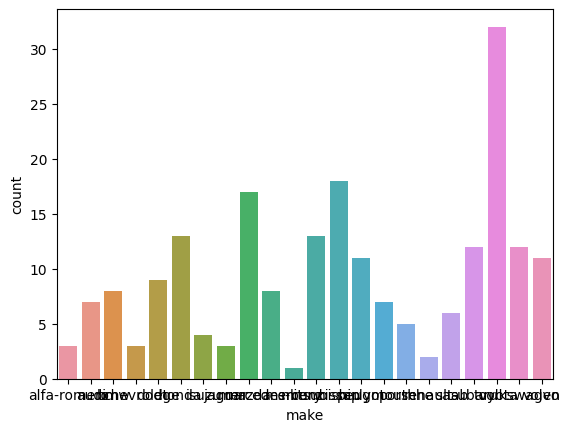

In [52]:
#count
sns.countplot(data=df,x=df['make'])

<Axes: title={'center': 'Bar plot of make'}, xlabel='make'>

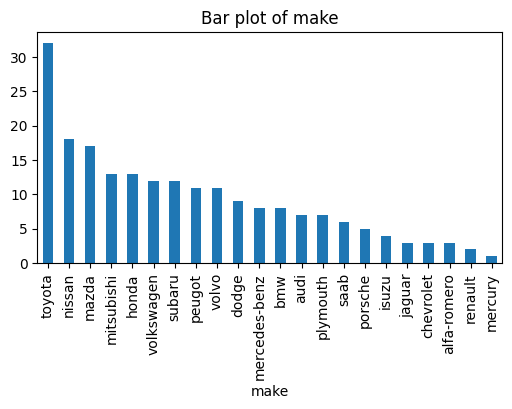

In [46]:
#Bar
df['make'].value_counts().plot(kind='bar',figsize=(6,3),xlabel='make',title='Bar plot of make')

In [ ]:
### conclusion
* In our dataset, we have 30 cars of toyota with highest frequency
* lowest cars is mercury of with 2
* mitsunishi and honda has same number of cars
* volkswagen and subaru has same number of cars
* peugot and volvo has same number of cars
* jaguar,chevrolet,alfa-romero has same number of cars

<Axes: title={'center': 'pie chart of make'}, ylabel='percentage'>

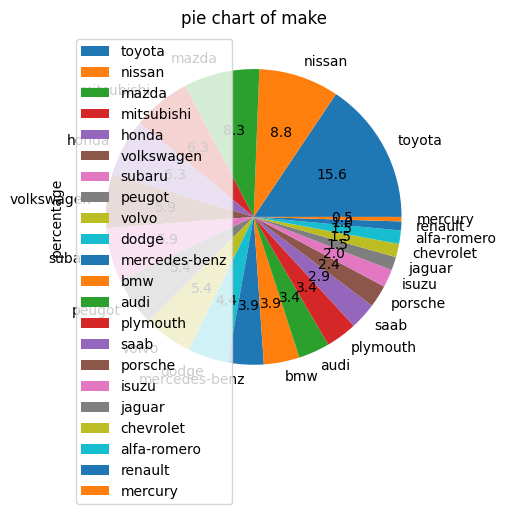

In [50]:
#pie chart
df['make'].value_counts().plot(kind='pie',autopct='%1.1f',ylabel='percentage',legend=True,title='pie chart of make')

### fuel type

In [55]:
plt.style.use('ggplot')

<Axes: xlabel='fuel_type', ylabel='count'>

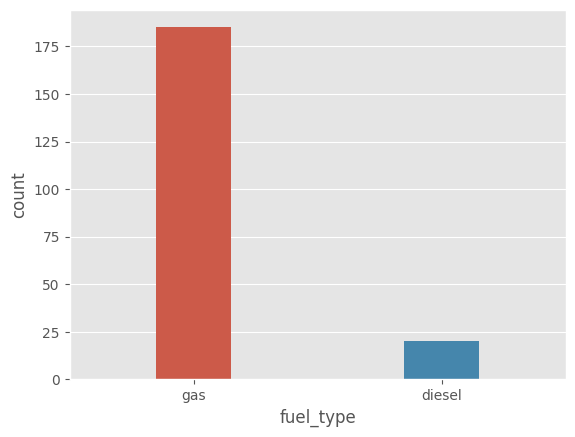

In [56]:
#count
sns.countplot(data=df,x=df['fuel_type'],width=0.3)

In [58]:
plt.style.use('classic')

<Axes: title={'center': 'Bar plot of fuel type'}, xlabel='fuel type'>

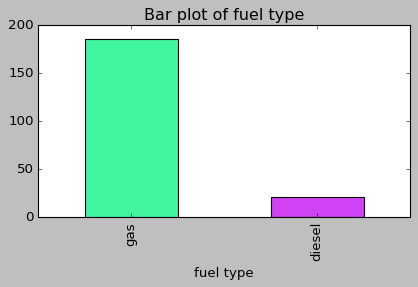

In [67]:
#Bar
df['fuel_type'].value_counts().plot(kind='bar',figsize=(6,3),xlabel='fuel type',color=['#42f5a1','#d142f5'],title='Bar plot of fuel type')

In [ ]:
### conclusion
* In our dataset, more cars are working with gas than diesel
* 190 cars are running with gas
* 20 cars are running with diesel

<Axes: title={'center': 'pie chart of fuel type'}, ylabel='percentage'>

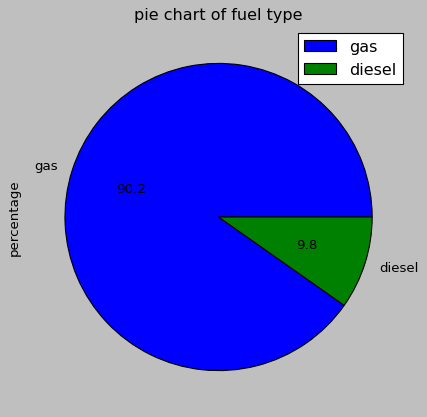

In [91]:
df['fuel_type'].value_counts().plot(kind='pie',autopct='%1.1f',ylabel='percentage',legend=True,title='pie chart of fuel type')

### aspiration

<Axes: xlabel='aspiration', ylabel='count'>

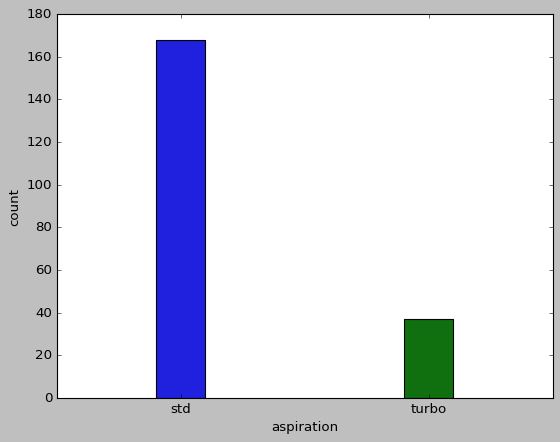

In [70]:
#count
sns.countplot(data=df,x=df['aspiration'],width=0.2)

In [94]:
plt.style.use('ggplot')

<Axes: title={'center': 'Bar plot of aspiration'}, xlabel='aspiration'>

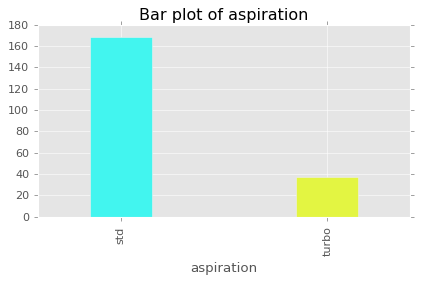

In [95]:
#Bar
df['aspiration'].value_counts().plot(kind='bar',width=0.3,color=['#42f5ef','#e3f542'],figsize=(6,3),xlabel='aspiration',title='Bar plot of aspiration')

In [ ]:
### concluaion
* In this std is using more in cars then turbo
* std is used in almost 170 cars
* where as turbo is used in 35 cars

<Axes: title={'center': 'pie chart of aspiration'}, ylabel='percentage'>

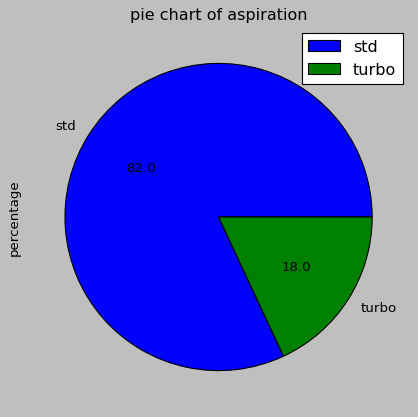

In [72]:
df['aspiration'].value_counts().plot(kind='pie',autopct='%1.1f',ylabel='percentage',legend=True,title='pie chart of aspiration')

<Axes: xlabel='body_style', ylabel='count'>

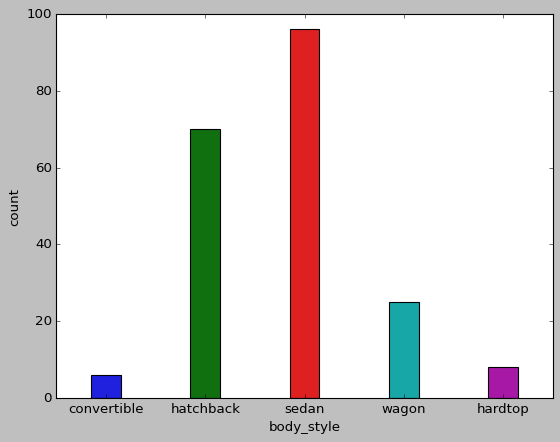

In [73]:
#count
sns.countplot(data=df,x=df['body_style'],width=0.3)

<Axes: title={'center': 'Bar plot of bodystyle'}, xlabel='body style'>

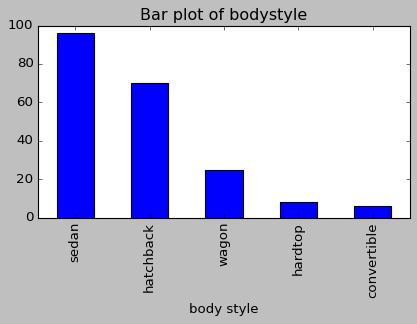

In [74]:
#Bar
df['body_style'].value_counts().plot(kind='bar',figsize=(6,3),xlabel='body style',title='Bar plot of bodystyle')

In [ ]:
### conclusion
* 95 cars are using sedan bodystyle (highest)
* the lowest using body style is convertible with 10 cars only 
* top 2 used bodystyles are sedan and hatchback

<Axes: title={'center': 'pie chart of body style'}, ylabel='percentage'>

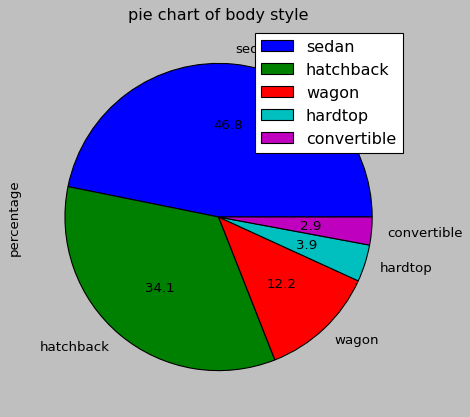

In [75]:
df['body_style'].value_counts().plot(kind='pie',autopct='%1.1f',ylabel='percentage',legend=True,title='pie chart of body style')

<Axes: xlabel='drive_wheels', ylabel='count'>

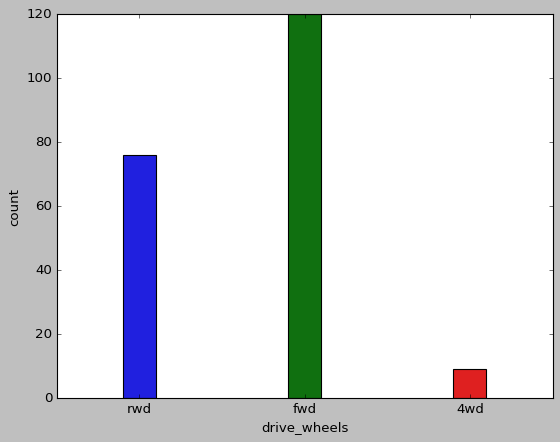

In [77]:
#count
sns.countplot(data=df,x=df['drive_wheels'],width=0.2)

In [98]:
plt.style.use('classic')

<Axes: title={'center': 'Bar plot of drive wheels'}, xlabel='drive wheels'>

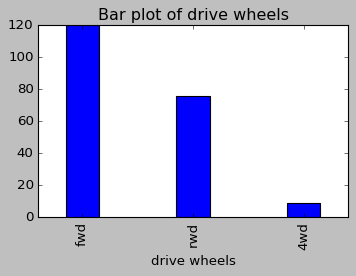

In [99]:
#Bar
df['drive_wheels'].value_counts().plot(kind='bar',width=0.3,figsize=(5,3),xlabel='drive wheels',title='Bar plot of drive wheels')

In [ ]:
### conclusion
* most using drive wheels is fwd with 120 cars 
* the lowest using is 4wd wheels
* top 2 using drive wheels are fwd,rwd

<Axes: title={'center': 'pie chart of drive wheels'}, ylabel='percentage'>

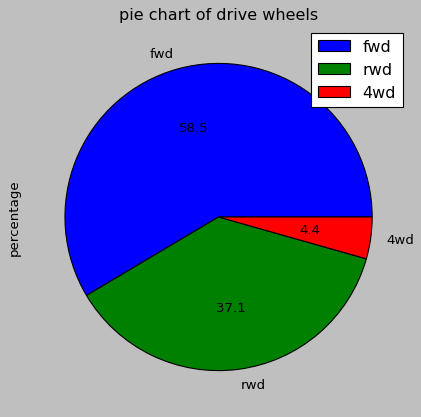

In [80]:
#pie chart
df['drive_wheels'].value_counts().plot(kind='pie',autopct='%1.1f',ylabel='percentage',legend=True,title='pie chart of drive wheels')

In [103]:
plt.style.use('dark_background')

<Axes: xlabel='engine_location', ylabel='count'>

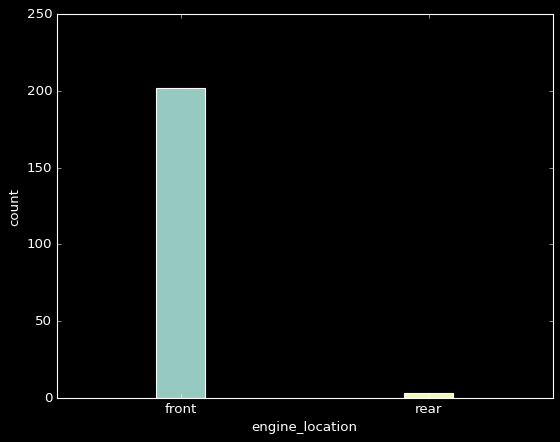

In [104]:
#count
sns.countplot(data=df,x=df['engine_location'],width=0.2)

In [106]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [109]:
plt.style.use('bmh')

<Axes: title={'center': 'Bar plot of engine location'}, xlabel='engine location'>

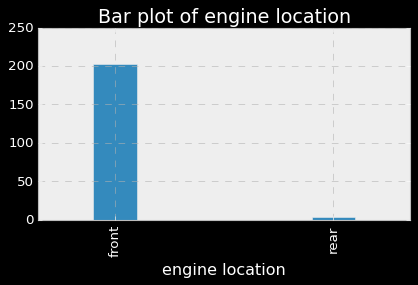

In [110]:
#Bar
df['engine_location'].value_counts().plot(kind='bar',width=0.2,figsize=(6,3),xlabel='engine location',title='Bar plot of engine location')

In [ ]:
### conclusion
* There are two engine locations in this plot, front and rear
* most of the cars are using front engine location

<Axes: title={'center': 'pie chart of engine location'}, ylabel='percentage'>

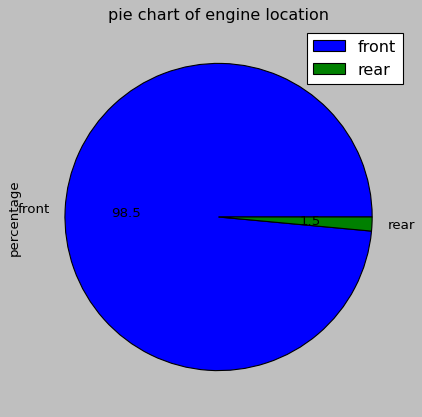

In [83]:
df['engine_location'].value_counts().plot(kind='pie',autopct='%1.1f',ylabel='percentage',legend=True,title='pie chart of engine location')

<Axes: xlabel='engine_type', ylabel='count'>

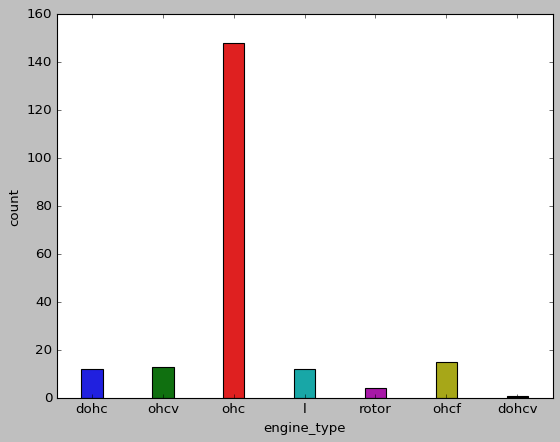

In [84]:
#count
sns.countplot(data=df,x=df['engine_type'],width=0.3)

<Axes: title={'center': 'Bar plot of engine type'}, xlabel='engine type'>

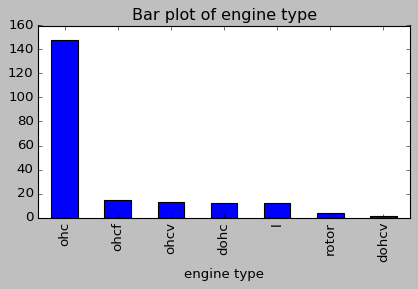

In [85]:
#Bar
df['engine_type'].value_counts().plot(kind='bar',figsize=(6,3),xlabel='engine type',title='Bar plot of engine type')

In [ ]:
### conclusion
* 150 cars are using ohc engine
* ohc engine type is the most using engine type
* the lowest using engine type is dohcv

<Axes: title={'center': 'pie chart of engine type'}, ylabel='percentage'>

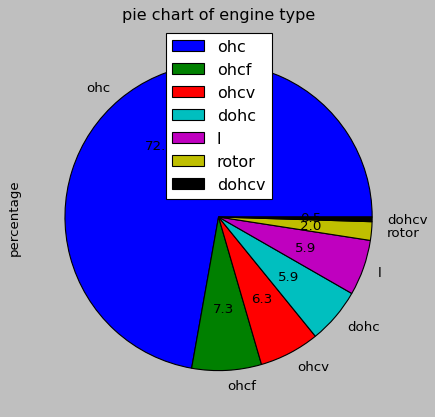

In [86]:
#pie chart
df['engine_type'].value_counts().plot(kind='pie',autopct='%1.1f',ylabel='percentage',legend=True,title='pie chart of engine type')

<Axes: xlabel='fuel_system', ylabel='count'>

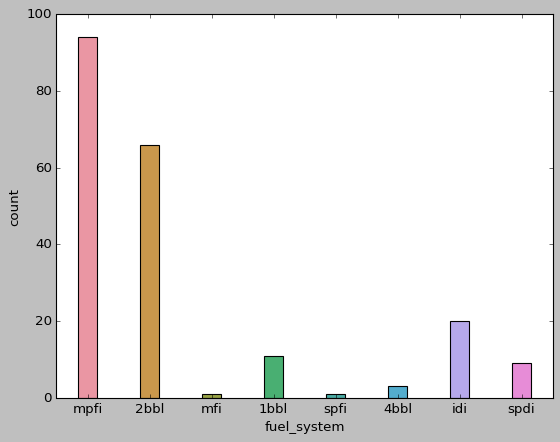

In [87]:
#count
sns.countplot(data=df,x=df['fuel_system'],width=0.3)

<Axes: title={'center': 'Bar plot of fuel system'}, xlabel='fuel system'>

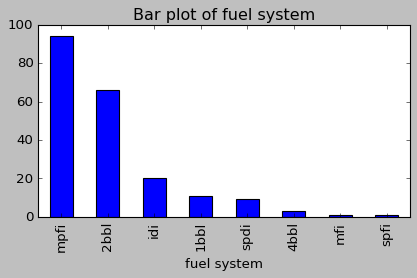

In [88]:
#Bar
df['fuel_system'].value_counts().plot(kind='bar',figsize=(6,3),xlabel='fuel system',title='Bar plot of fuel system')

In [ ]:
### conclusion
* there are 8 diff fuel systems in this plot
* most using fuel system is mpfi by 98 cars
* the lowest using fuel system is mfi and spfi by 1 car only

<Axes: title={'center': 'pie chart of fuel system'}, ylabel='percentage'>

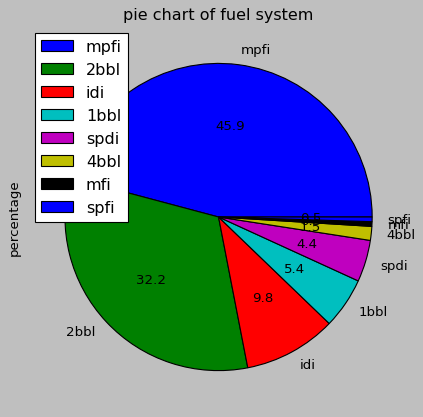

In [89]:
df['fuel_system'].value_counts().plot(kind='pie',autopct='%1.1f',ylabel='percentage',legend=True,title='pie chart of fuel system')

## Numerical

In [111]:
df.dtypes

make                  object
fuel_type             object
aspiration            object
num_of_doors         float64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size          float64
fuel_system           object
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

### num of doors

In [131]:
plt.style.use('dark_background')

<Axes: ylabel='Frequency'>

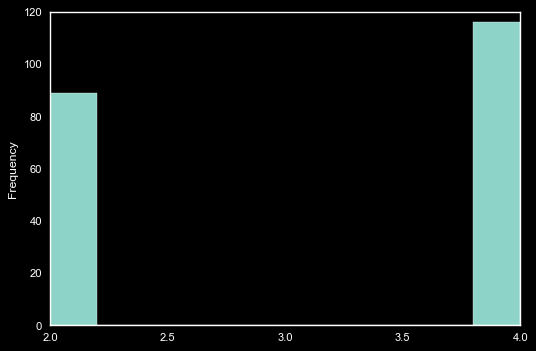

In [269]:
#histogram
df['num_of_doors'].plot(kind='hist',figsize=(6,4))

### conclusion
* normally distributed
* 4 no of doors are mostly using in cars with frequency of 119

In [129]:
plt.style.use('dark_background')

<Axes: ylabel='Density'>

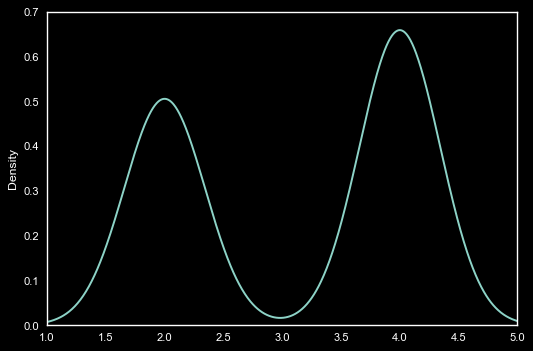

In [267]:
#density plot
df['num_of_doors'].plot(kind='kde',figsize=(6,4))

### conclusion
* normally distributed

In [125]:
plt.style.use('classic')

<Axes: >

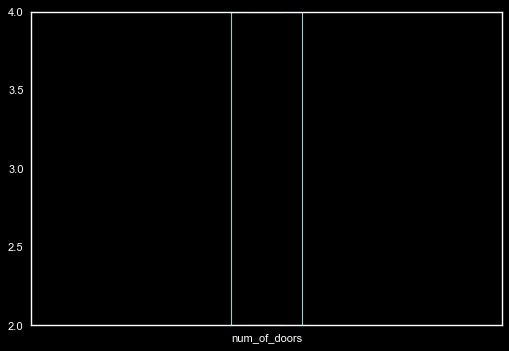

In [268]:
#Box plot
df['num_of_doors'].plot(kind='box',figsize=(6,4))

### conclusion
* Normally distributed

In [266]:
df['num_of_doors'].mean(),df['num_of_doors'].median()

(3.131707317073171, 4.0)

### wheel base

<Axes: ylabel='Frequency'>

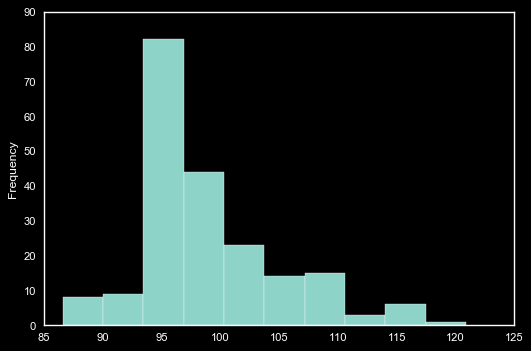

In [265]:
#histogram
df['wheel_base'].plot(kind='hist',figsize=(6,4))

### conclusion
* following normal distribution
* wheel base of 92-95 is mostly using with frequency of 80 cars
* lowest using wheel base is 120 with 2 cars

<Axes: ylabel='Density'>

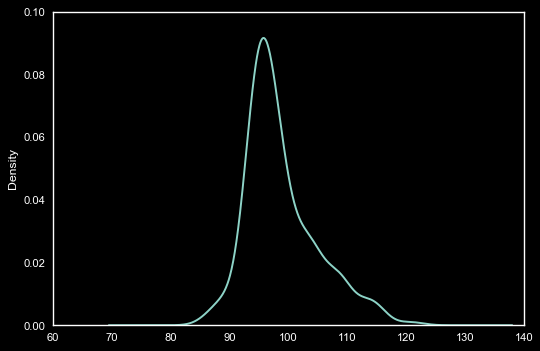

In [264]:
#density plot
df['wheel_base'].plot(kind='kde',figsize=(6,4))

### conclusion
* following normal distribution(bell shaped curve)
* median = 95

<Axes: >

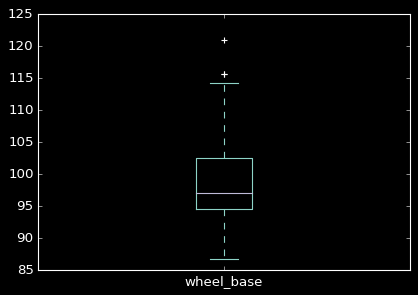

In [140]:
#Box plot
df['wheel_base'].plot(kind='box',figsize=(6,4))

### conclusion
* there are outliers(greater than upperlimit)
* normally distributed(by viscor)
* min = 86
* max = 112

In [263]:
df['wheel_base'].mean(),df['wheel_base'].median()

(98.75219512195125, 97.0)

### length

<Axes: ylabel='Frequency'>

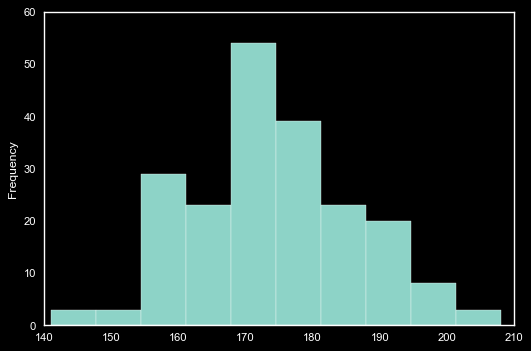

In [262]:
#histogram
df['length'].plot(kind='hist',figsize=(6,4))

### conclusion
* following normal distribution
* heighest using length is 170

<Axes: ylabel='Density'>

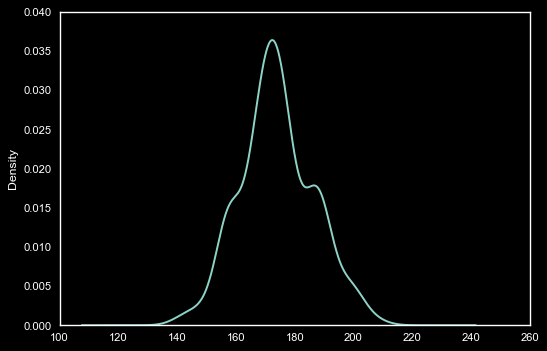

In [261]:
#density plot
df['length'].plot(kind='kde',figsize=(6,4))

### conclusion
* following normal distribution(bell shaped curve)
* median = 170

<Axes: >

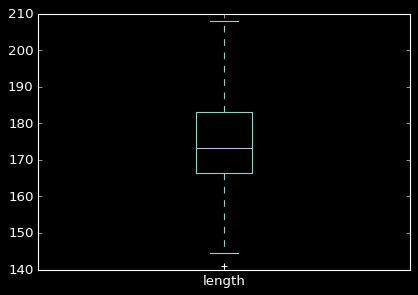

In [144]:
#Box plot
df['length'].plot(kind='box',figsize=(6,4))

### conclusion
* there are outliers(less then lowerlimit)
* following normal distribution(by viscor,median in the box)
* min = 143
* max=210

In [260]:
df['length'].mean(),df['length'].median()

(174.04926829268288, 173.2)

### width

<Axes: ylabel='Frequency'>

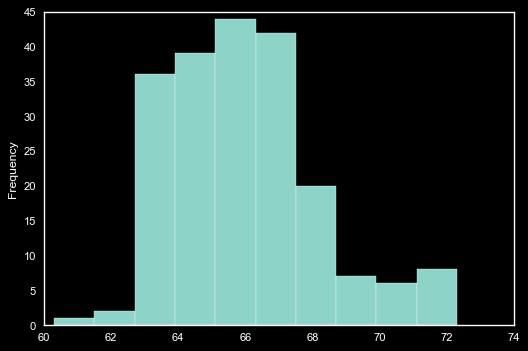

In [259]:
#Histogram
df['width'].plot(kind='hist',figsize=(6,4))

### conclusion
* following normal distribution
* width of 65-66 is having the highest frequency
* width of 60-61 has the lowest frequency

<Axes: ylabel='Density'>

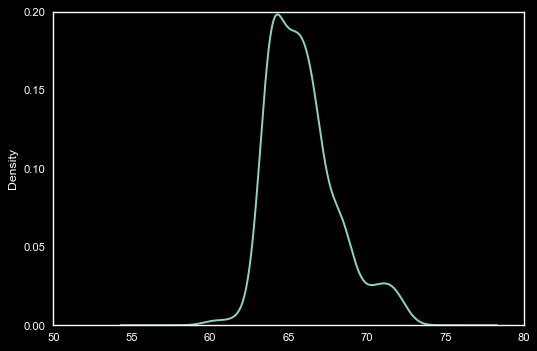

In [258]:
#density plot
df['width'].plot(kind='kde',figsize=(6,4))

### conclusion
* Following normal distribution(bell shaped curve)
* Median 65
* more cars are having width of 64

<Axes: >

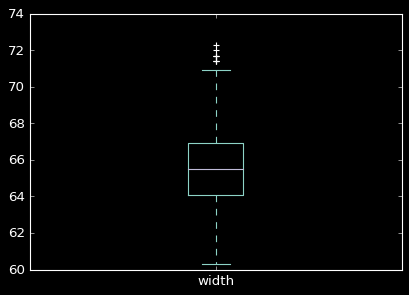

In [148]:
#Box plot
df['width'].plot(kind='box',figsize=(6,4))

### conclusion
* There are outliers in the data(greater than upperlimit)
* It is following normal distribution(by viscor,median in the box)
* min=60
* max=71

In [257]:
df['width'].mean(),df['width'].median()

(65.90780487804878, 65.5)

<Axes: ylabel='Frequency'>

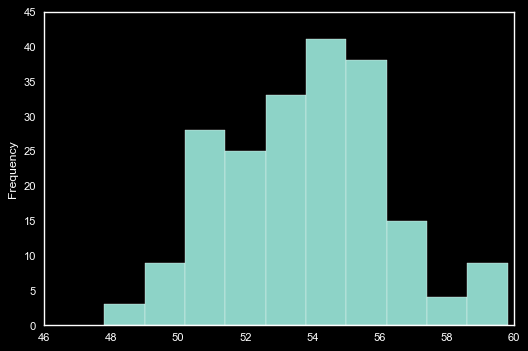

In [256]:
#histogram
df['height'].plot(kind='hist',figsize=(6,4))

### conclusion
* following normal distribution
* highest frequency value is 54-55height with 42 frequency

<Axes: ylabel='Density'>

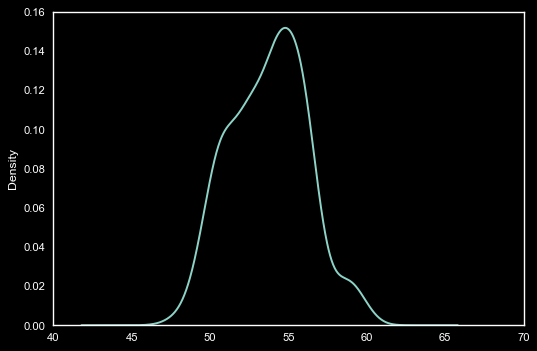

In [255]:
#density plot
df['height'].plot(kind='kde',figsize=(6,4))

### conclusion
* Following normal distribution
* Median 53

<Axes: >

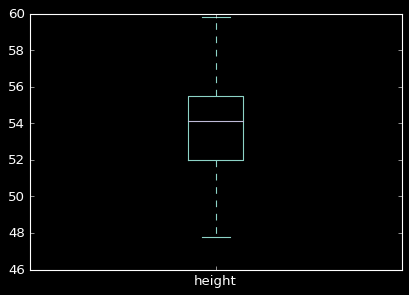

In [152]:
#Box plot
df['height'].plot(kind='box',figsize=(6,4))

### conclusion
* There are no outliers in the data
* Data is normally distributed(by viscor,median in the box)
* min = 47
* max=60

In [254]:
df['height'].mean(),df['height'].median()

(53.72487804878049, 54.1)

### curb weight

<Axes: ylabel='Frequency'>

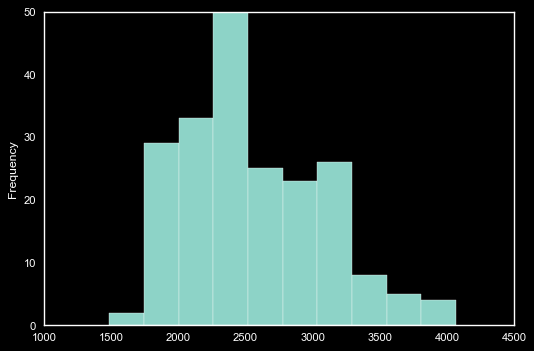

In [253]:
#histogram
df['curb_weight'].plot(kind='hist',figsize=(6,4))

### conclusion
* Data is normally distributed
* 2250-2500 curb weight has the highest frequency of 50 
* 400 curb weight has the lowest frequency

<Axes: ylabel='Density'>

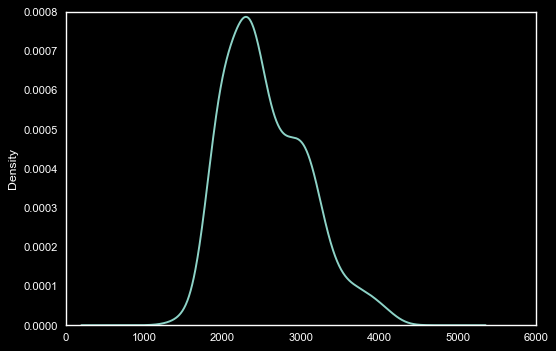

In [252]:
#density plot
df['curb_weight'].plot(kind='kde',figsize=(6,4))

### conclusion
* Data is not normally distributed
* 2200 curb weight is has the highest probability of 0.008

<Axes: >

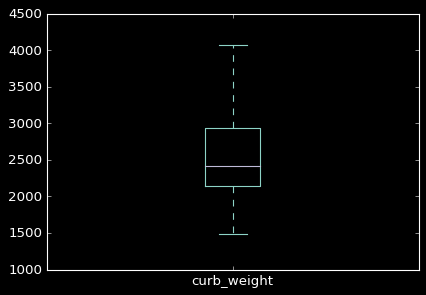

In [156]:
#Box plot
df['curb_weight'].plot(kind='box',figsize=(6,4))

### conclusion
* There are no outliers
* Not normally distributed

In [251]:
df['curb_weight'].mean(),df['curb_weight'].median()

(2555.5658536585365, 2414.0)

### num of cylinders

<Axes: ylabel='Frequency'>

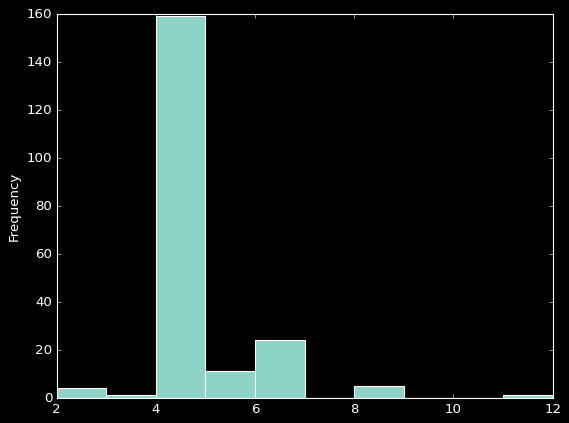

In [157]:
#histogram
df['num_of_cylinders'].plot(kind='hist')

### conclusion
* Following normal distribution
* 4-5 doors are using in more cars

<Axes: ylabel='Density'>

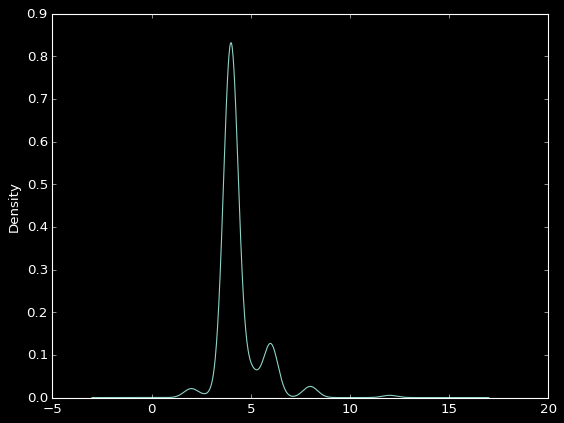

In [158]:
#density plot
df['num_of_cylinders'].plot(kind='kde')

### conclusion
* Following normal distribution(bell shaped curve)
* 4 doors has highest probability of 0.85

In [249]:
plt.style.use('dark_background')

<Axes: >

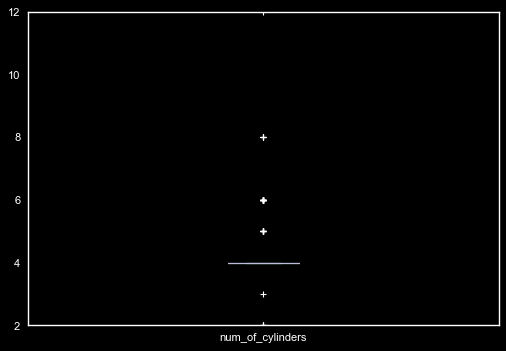

In [250]:
#Box plot
df['num_of_cylinders'].plot(kind='box',figsize=(6,4))

### conclusion
* there are outliers

In [248]:
df['num_of_cylinders'].mean(),df['num_of_cylinders'].median()

(4.380487804878049, 4.0)

### Engine size

<Axes: ylabel='Frequency'>

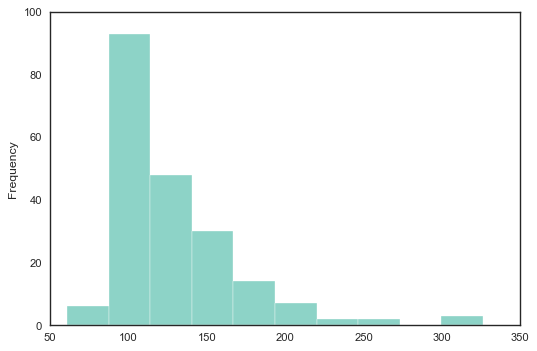

In [245]:
#histogram
df['engine_size'].plot(kind='hist',figsize=(6,4))

### conclusion
* Following normal distribution
* the engine size from 75-100 has highest frequency

<Axes: ylabel='Density'>

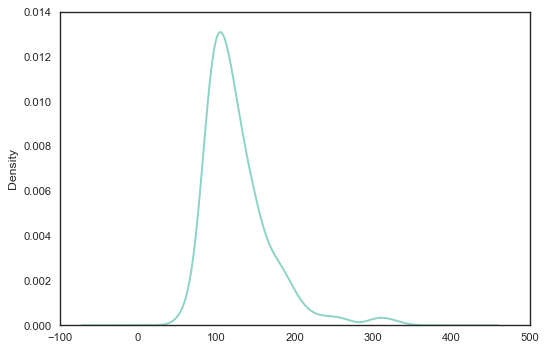

In [247]:
#density plot
df['engine_size'].plot(kind='kde',figsize=(6,4))

### conclusion
* Following normal distribution(bell shaped curve)
* Median is 120

<Axes: >

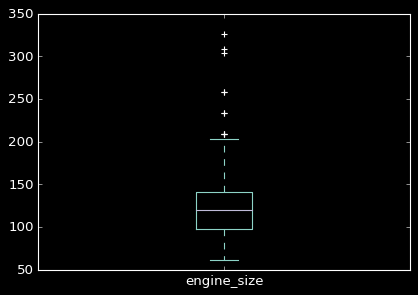

In [164]:
#Box plot
df['engine_size'].plot(kind='box',figsize=(6,4))

In [246]:
df['engine_size'].mean(),df['engine_size'].median()

(127.09756097560975, 120.0)

### compression ratio

<Axes: xlabel='compression ratio', ylabel='Frequency'>

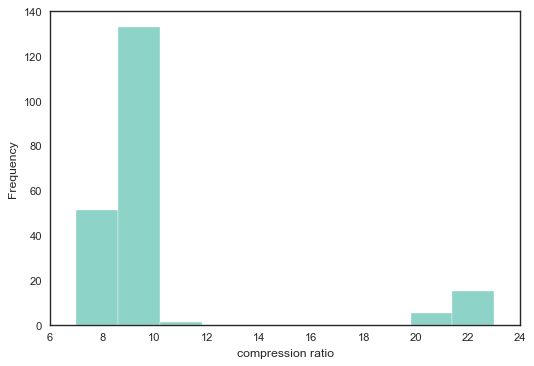

In [244]:
#histogram
df['compression_ratio'].plot(kind='hist',xlabel='compression ratio',figsize=(6,4))

### conclusion
* The highest compression ratio is 8-10 with frequency of 138

<Axes: ylabel='Density'>

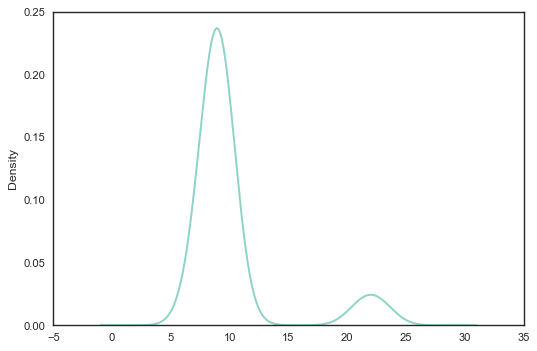

In [243]:
#density plot
df['compression_ratio'].plot(kind='kde',figsize=(6,4))

### conclusion
* Median is 9
* Following normal distribution

<Axes: >

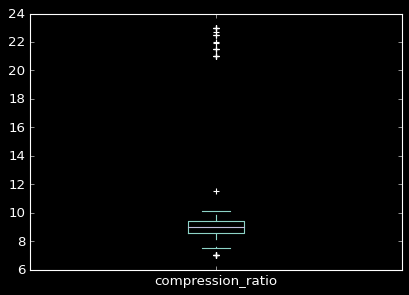

In [168]:
#Box plot
df['compression_ratio'].plot(kind='box',figsize=(6,4))

### conclusion
* There are outliers in the data both(less then lower values and greater than upper values)
* Following normal distribution(by viscor,median in the box)
* min =7
* max=10

In [242]:
df['compression_ratio'].mean(),df['compression_ratio'].median()

(10.142536585365855, 9.0)

### horsepower

<Axes: title={'center': 'Histogram of horsepower'}, xlabel='horsepower', ylabel='Frequency'>

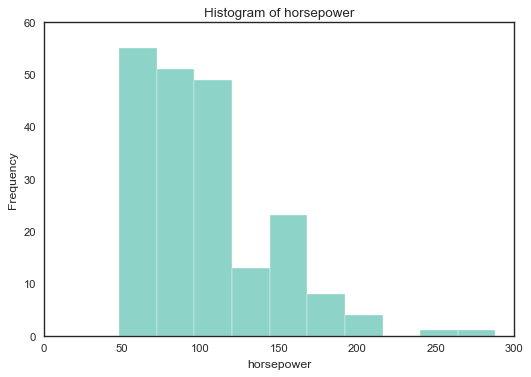

In [239]:
#histogram
df['horsepower'].plot(kind='hist',xlabel='horsepower',title='Histogram of horsepower',figsize=(6,4))

### conclusion
* The horsepower with 50-75 is producing by more cars
* Not following normal distribution

<Axes: ylabel='Density'>

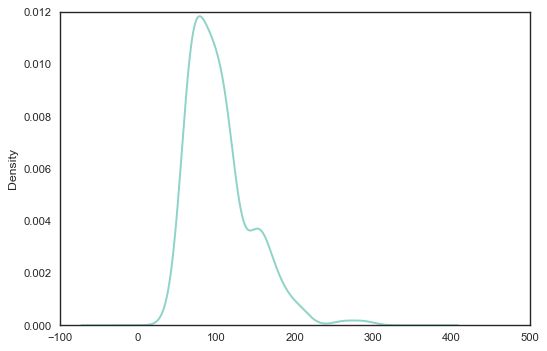

In [241]:
#density plot
df['horsepower'].plot(kind='kde',figsize=(6,4))

### conclusion
* Not following normal distribution

<Axes: >

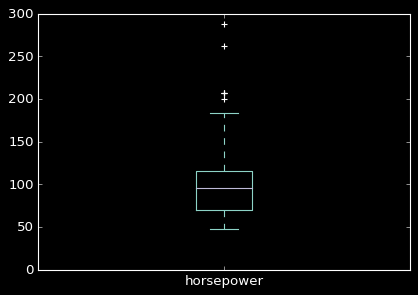

In [172]:
#Box plot
df['horsepower'].plot(kind='box',figsize=(6,4))

### conclusion
* There are outliers(greater than upperlimit)
* min=50
* max=175
* not following normal distribution(by viscor)

In [240]:
df['horsepower'].mean(),df['horsepower'].median()

(104.16585365853659, 95.0)

### peak rpm

In [233]:
plt.style.use('seaborn-v0_8-white')

<Axes: ylabel='Frequency'>

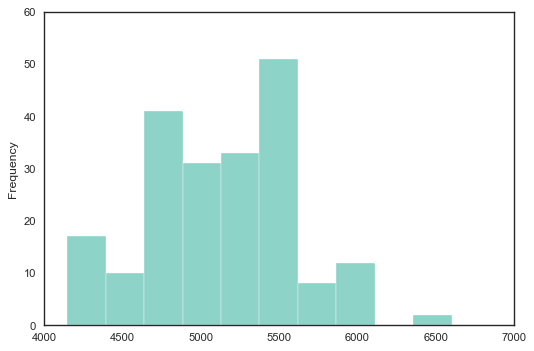

In [235]:
#histogram
df['peak_rpm'].plot(kind='hist',figsize=(6,4))

### conclusion
* The peak rpm with 5000-5500 is the top one
* The second most is 4500-5000

<Axes: ylabel='Density'>

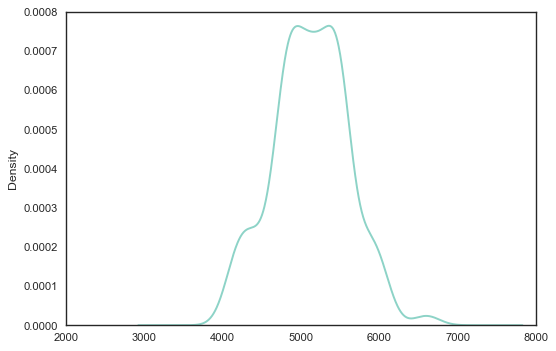

In [237]:
#density plot
df['peak_rpm'].plot(kind='kde',figsize=(6,4))

### conclusion
* Following normal distribution(bell shaped curve)
* Median is 5200

<Axes: >

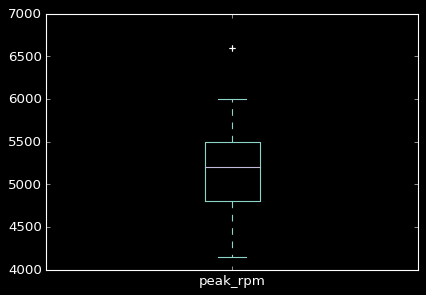

In [176]:
#Box plot
df['peak_rpm'].plot(kind='box',figsize=(6,4))

### conclusion
* There are no outliers in peak_rpm
* Its following normal distribution(by viscor and median in box)
* min value = 4200
* max value=6000

In [236]:
df['peak_rpm'].mean(),df['peak_rpm'].median()

(5126.09756097561, 5200.0)

<Axes: ylabel='Frequency'>

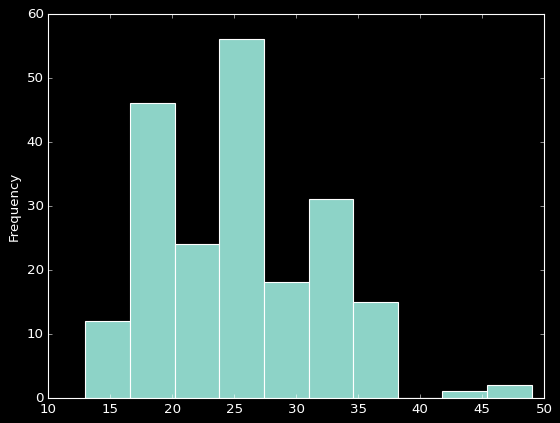

In [177]:
#histogram
df['city_mpg'].plot(kind='hist')

<Axes: ylabel='Density'>

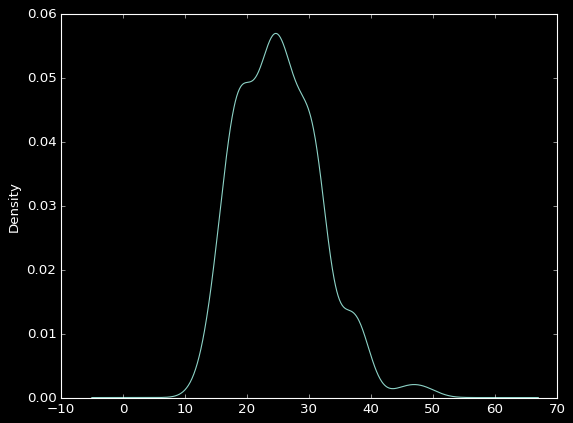

In [178]:
#density plot
df['city_mpg'].plot(kind='kde')

<Axes: >

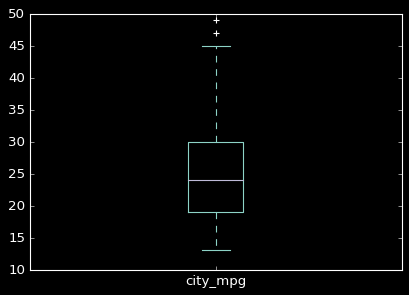

In [180]:
#Box plot
df['city_mpg'].plot(kind='box',figsize=(6,4))

### highway mpg

In [225]:
plt.style.use('seaborn-v0_8-white')

<Axes: ylabel='Frequency'>

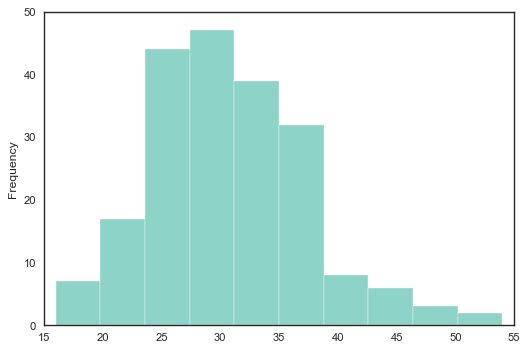

In [227]:
#histogram
df['highway_mpg'].plot(kind='hist',figsize=(6,4))

### conclusion
* The highest milage per galem is produced at frequency of 48
* The lowest milage per galem is galem at frequency of 45
* Data is normally distributed

In [229]:
plt.style.use('dark_background')

<Axes: ylabel='Density'>

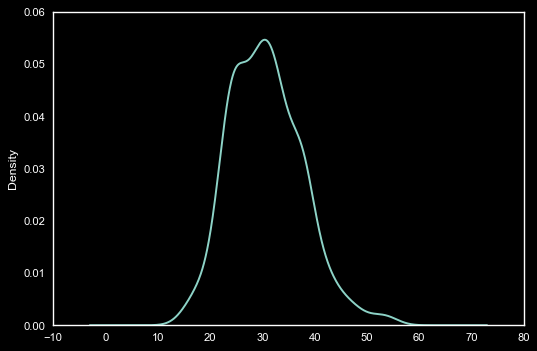

In [230]:
#density plot
df['highway_mpg'].plot(kind='kde',figsize=(6,4))

### conclusion
* Data is normally distributed(by bell shaped curve)
* Median is 30

<Axes: >

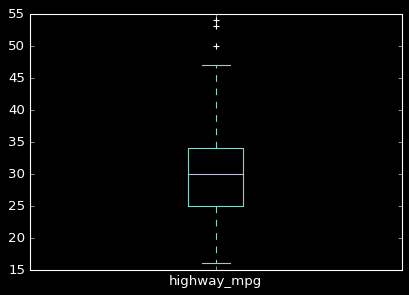

In [184]:
#Box plot
df['highway_mpg'].plot(kind='box',figsize=(6,4))

### conclusion
* Data is normally distributed(by viscor,median value in the box)
* there are outliers in the data(greater than upper limit)

In [231]:
df['highway_mpg'].mean(),df['highway_mpg'].median()

(30.75121951219512, 30.0)

### price

In [223]:
plt.style.use('seaborn-v0_8-notebook')

<Axes: ylabel='Frequency'>

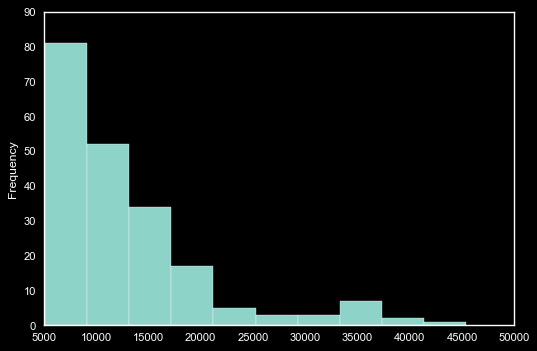

In [232]:
#histogram
df['price'].plot(kind='hist',figsize=(6,4))

### conclusion
* 5000 us dollars cars have high frequency 
* Lowest car price is 5000-10000us dollars
* Highest car price is 45000us dollars

In [221]:
plt.style.use('seaborn-v0_8-notebook')

<Axes: ylabel='Density'>

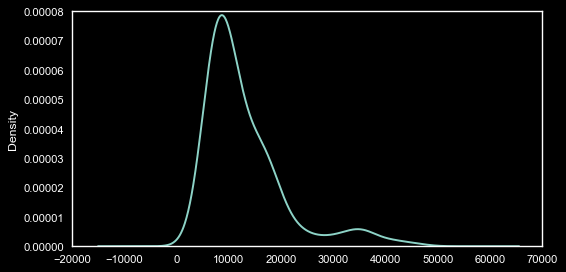

In [222]:
#density
df['price'].plot(kind='density',figsize=(6,3))

### conclusion
* probability of cars to get with a price of 10000 is 0.00008
* it is not normally distributed
* 50000us dollars have very less probability

In [211]:
plt.style.use('dark_background')

<Axes: >

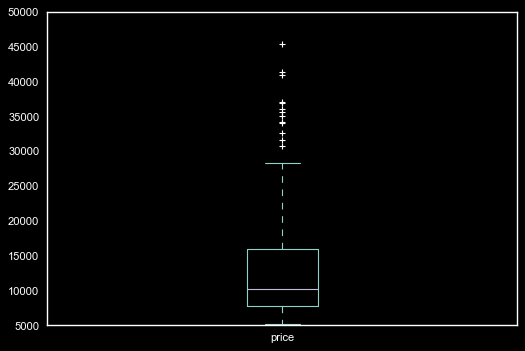

In [212]:
#box
df['price'].plot(kind='box',figsize=(6,4))

### conclusion
* It have outliers(greater than upper limit)
* Data is not normally distributed
* By observing viscar length and median value

In [213]:
df['price'].mean(),df['price'].median() #not closed values

(12949.073170731708, 10221.0)

In [190]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']